<small><font color=gray>Notebook author: <a href="https://www.linkedin.com/in/olegmelnikov/" target="_blank">Oleg Melnikov</a> ©2021 onwards</font></small><hr style="margin:0;background-color:silver">

**[<font size=6>💎Diamonds</font>](https://www.kaggle.com/competitions/11sep23hse-diamonds)**. [**Instructions**](https://colab.research.google.com/drive/1riOGrE_Fv-yfIbM5V4pgJx4DWcd92cZr#scrollTo=ITaPDPIQEgXV) for running Colabs.

<small>**(Optional) CONSENT.** <mark>[ X ]</mark> We consent to sharing our Colab (after the assignment ends) with other students/instructors for educational purposes. We understand that sharing is optional and this decision will not affect our grade in any way. <font color=gray><i>(If ok with sharing your Colab for educational purposes, leave "X" in the check box.)</i></font></small>

In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.19.2
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.1
cufflinks==0.17.3
cupy-cuda12x==12.2.0
cvxopt==1.3.2
cvxpy==1.3.3
cycler==0.12.1
c

In [ ]:
from google.colab import drive; drive.mount('/content/drive')   # OK to enable, if your kaggle.json is stored in Google Drive

Mounted at /content/drive


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle > log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                                           # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
# !cp kaggle.json ~/.kaggle/kaggle.json > log                   # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                              # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v 11sep23hse-diamonds         # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log                          # download competition dataset as a zip file
!unzip -o *.zip >> log                                        # Kaggle dataset is copied as a single file and needs to be unzipped.
!kaggle competitions leaderboard --show                       # print public leaderboard

- competition is now set to: 11sep23hse-diamonds
100% 3.30M/3.30M [00:00<00:00, 96.2MB/s]
Using competition: 11sep23hse-diamonds
  teamId  teamName              submissionDate       score       
--------  --------------------  -------------------  ----------  
10917685  M                     2023-09-22 08:10:06  578.90384   
10907943  S                     2023-09-24 11:52:14  585.71362   
10920470  X                     2023-09-23 16:58:33  590.07234   
10915293  Y                     2023-09-24 17:54:28  610.87535   
10904668  A                     2023-09-24 16:34:28  611.43810   
10904700  F                     2023-09-23 19:48:58  629.39955   
10961721  V                     2023-09-24 16:30:02  634.29872   
10904649  I                     2023-09-24 16:37:49  646.61233   
10949463  P                     2023-09-24 14:34:21  654.69705   
10943536  N                     2023-09-24 14:33:06  658.26216   
10910292  B                     2023-09-22 19:41:18  667.49689   
10944359  T (

In [ ]:
%%time
%%capture
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, seaborn as sns, os, tqdm, re, sys, cv2, skimage
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals
os.environ['TF_DETERMINISTIC_OPS'] = '1'; os.environ['TF_CUDNN_DETERMINISTIC'] = '1'; # allows seeding RNG on GPU

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=100, precision=2, edgeitems=2, suppress=True)
pd.set_option('display.max_columns', 20, 'display.precision', 2, 'display.max_rows', 4)
tDIR, sDIR = 'trainXY/', 'testY/'

CPU times: user 1.21 s, sys: 320 ms, total: 1.53 s
Wall time: 2.58 s


In [ ]:
df = pd.read_csv('XY_diamonds.csv'); df

,carat,depth,table,x,y,z,cut,color,clarity,price
0,0.35,67.2,57.1,4.64,4.69,2.87,I,G,VS1,NaN
1,1.64,67.3,60.7,7.84,7.82,4.94,V,E,SI1,NaN
...,...,...,...,...,...,...,...,...,...,...
199998,0.48,68.7,53.0,4.47,4.45,2.72,I,G,IF,1474.0
199999,0.48,65.0,64.7,5.60,5.62,3.44,I,H,VS2,765.0


In [ ]:
df.price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: price
Non-Null Count   Dtype  
--------------   -----  
160000 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [ ]:
vX = df.query('price!=price').drop('price', axis=1)  # slice a test sample
tXY = df.query('price==price')                       # slice training sample
tX, tY = tXY.drop('price', axis=1), tXY.price        # split into training I/O

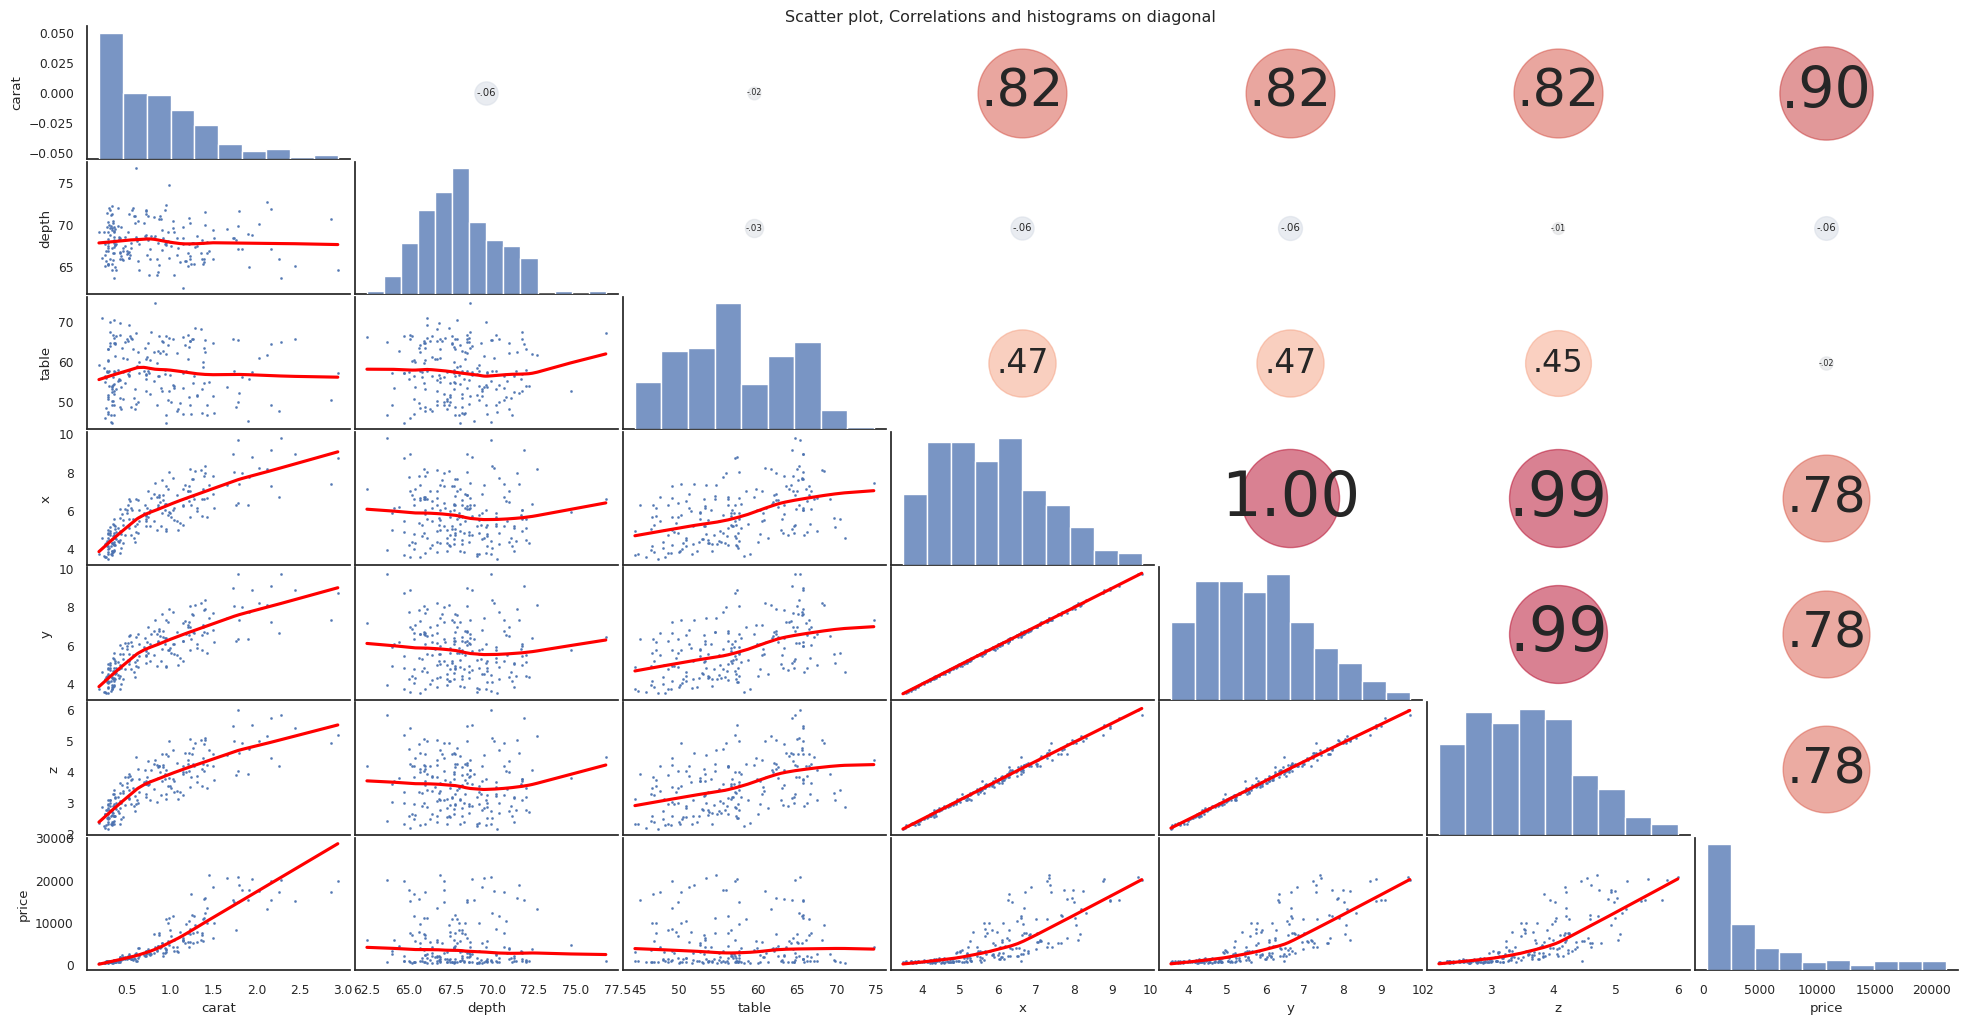

In [ ]:
def ScatterCorrHist(df):
  def corrdot(*args, **kwargs):
    # credit: https://stackoverflow.com/questions/48139899
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca();
    ax.set_axis_off();
    msz = abs(corr_r) * 5000   # marker size
    fsz = abs(corr_r) * 40 + 5 # font size
    ax.scatter([.5], [.5], msz, [corr_r], alpha=0.5, cmap='coolwarm', vmin=-1, vmax=1, transform=ax.transAxes)
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', va='center', fontsize=fsz)

  sns.set(style='white', font_scale=.8);
  g = sns.PairGrid(df, aspect=1, diag_sharey=False);
  g.fig.set_size_inches(20,10)
  g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color':'red'}, scatter_kws={'s':1});
  g.map_diag(sns.histplot, kde_kws={'color':'black'});
  g.map_upper(corrdot);
  g.fig.suptitle("Scatter plot, Correlations and histograms on diagonal", y=1);
  _ = plt.subplots_adjust(hspace=0.02, wspace=0.02);
  _ = plt.show();

ScatterCorrHist(tXY.head(200))  # takes a minute time to run

In [ ]:
tmr = Timer()

⏳ started. You have 60 sec. Good luck!


<hr color=green size=40>

<strong><font color=green size=5>⏳Timed Green Playground (TGP): Your ideas, code, documentation, and timer START HERE!</font></strong>

<font color=green>Students: Keep all your definitions, code, documentation in <b>TGP</b>. Modifying any code outside of TGP incurs penalties.

# EDA

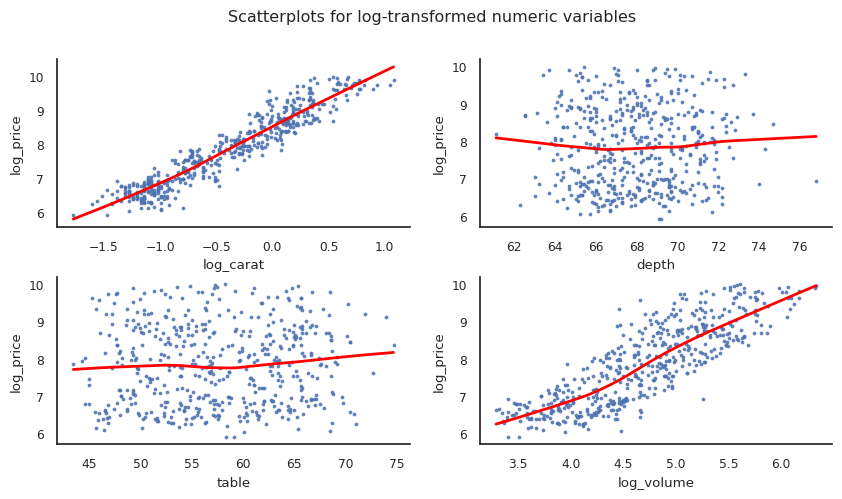

In [ ]:
tXY_temp = tXY.copy()
tXY_temp['log_price'] = np.log(tXY_temp['price'])
tXY_temp['log_carat'] = np.log(tXY_temp['carat'])
tXY_temp['log_volume'] = np.log(tXY_temp['x'] * tXY_temp['y'] * tXY_temp['z'] + 1)

sns.set_style('white')
fig, axs = plt.subplots(2, 2)
sns.regplot(data=tXY_temp[:500], x='log_carat', y='log_price', ax=axs[0,0], scatter_kws={'s':3}, line_kws={'lw':2, 'color':'red'}, lowess=True, ci=False)
sns.regplot(data=tXY_temp[:500], x='depth', y='log_price', ax=axs[0,1], scatter_kws={'s':3}, line_kws={'lw':2, 'color':'red'}, lowess=True, ci=False)
sns.regplot(data=tXY_temp[:500], x='table', y='log_price', ax=axs[1,0], scatter_kws={'s':3}, line_kws={'lw':2, 'color':'red'}, lowess=True, ci=False)
sns.regplot(data=tXY_temp[:500], x='log_volume', y='log_price', ax=axs[1,1], scatter_kws={'s':3}, line_kws={'lw':2, 'color':'red'}, lowess=True, ci=False)
sns.despine()
fig.set_size_inches(10, 5)
plt.subplots_adjust(hspace=0.3)
plt.suptitle('Scatterplots for log-transformed numeric variables')
plt.show();

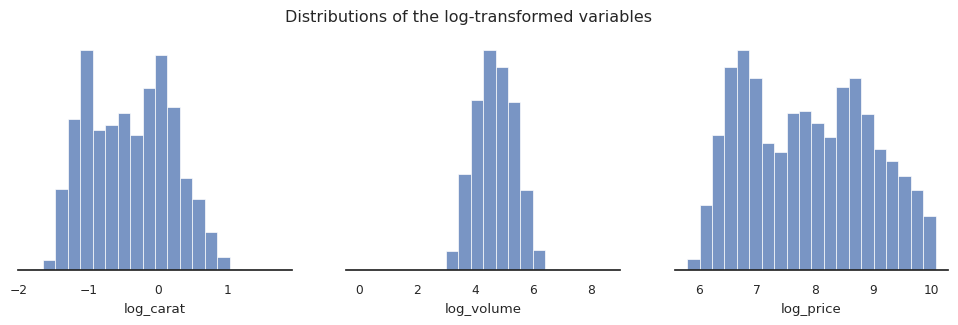

In [ ]:
fig, axs = plt.subplots(1, 3)
sns.histplot(tXY_temp['log_carat'], ax=axs[0], bins=20)
sns.histplot(tXY_temp['log_volume'], ax=axs[1], bins=20)
sns.histplot(tXY_temp['log_price'], ax=axs[2], bins=20)
axs[0].set_ylabel('')
axs[0].set_yticklabels('')
axs[1].set_ylabel('')
axs[1].set_yticklabels('')
axs[2].set_ylabel('')
axs[2].set_yticklabels('')
sns.despine(top=True, left=True, right=True)
fig.suptitle('Distributions of the log-transformed variables')
fig.set_size_inches(12, 3)
plt.show();

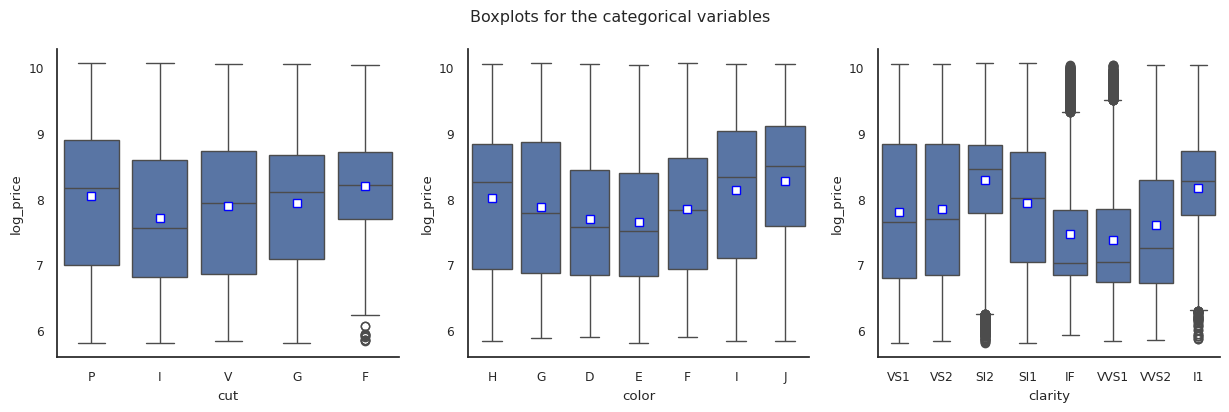

In [ ]:
# Credit: https://stackoverflow.com/questions/54132989/seaborn-boxplot-change-color-and-shape-of-mean
fig, axs = plt.subplots(1, 3)
sns.boxplot(data=tXY_temp, x='cut', y='log_price', showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"}, ax=axs[0])
sns.boxplot(data=tXY_temp, x='color', y='log_price', showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"}, ax=axs[1])
sns.boxplot(data=tXY_temp, x='clarity', y='log_price', showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"}, ax=axs[2])
plt.suptitle('Boxplots for the categorical variables')
sns.despine()
fig.set_size_inches(15, 4)
plt.show();

# Feature engineering

We log transform the variables price, color and carat as they are skewed to the right.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

cols_to_drop = [
    'color_E^2', 'color_F^2', 'color_G^2', 'color_H^2', 'color_I^2', 'color_J^2', 'clarity_IF^2', 'clarity_SI1^2', 'clarity_SI2^2',
    'clarity_VS1^2', 'clarity_VS2^2', 'clarity_VVS1^2', 'clarity_VVS2^2', 'carat color_E^2', 'carat color_G^2', 'carat color_H^2',
    'carat color_J^2', 'carat clarity_IF^2', 'carat clarity_SI1^2', 'carat clarity_SI2^2', 'carat clarity_VS1^2', 'carat clarity_VS2^2',
    'carat clarity_VVS1^2', 'carat clarity_VVS2^2', 'depth color_E^2', 'depth color_F^2', 'depth color_G^2', 'depth color_H^2',
    'depth color_I^2', 'depth color_J^2', 'depth clarity_IF^2', 'depth clarity_SI1^2', 'depth clarity_SI2^2', 'depth clarity_VS1^2',
    'depth clarity_VS2^2', 'depth clarity_VVS1^2', 'depth clarity_VVS2^2', 'table color_E^2', 'table color_F^2', 'table color_G^2',
    'table color_H^2', 'table color_I^2', 'table color_J^2', 'table clarity_IF^2', 'table clarity_SI1^2', 'table clarity_SI2^2',
    'table clarity_VS1^2', 'table clarity_VS2^2', 'table clarity_VVS1^2', 'table clarity_VVS2^2', 'cut_enc color_F^2', 'cut_enc color_G^2',
    'cut_enc color_H^2', 'cut_enc color_I^2', 'cut_enc color_J^2', 'cut_enc clarity_IF^2', 'cut_enc clarity_SI1^2', 'cut_enc clarity_SI2^2',
    'cut_enc clarity_VS1^2', 'cut_enc clarity_VS2^2', 'cut_enc clarity_VVS1^2', 'cut_enc clarity_VVS2^2', 'color_E^3', 'color_E^2 color_F',
    'color_E^2 color_G', 'color_E^2 color_H', 'color_E^2 color_I', 'color_E^2 color_J', 'color_E^2 clarity_IF', 'color_E^2 clarity_SI1',
    'color_E^2 clarity_SI2', 'color_E^2 clarity_VS1', 'color_E^2 clarity_VS2', 'color_E^2 clarity_VVS1', 'color_E^2 clarity_VVS2',
    'color_E^2 volume', 'color_E color_F^2', 'color_E color_G^2', 'color_E color_H^2', 'color_E color_I^2', 'color_E color_J^2',
    'color_E clarity_IF^2', 'color_E clarity_SI1^2', 'color_E clarity_SI2^2', 'color_E clarity_VS1^2', 'color_E clarity_VS2^2',
    'color_E clarity_VVS1^2', 'color_E clarity_VVS2^2', 'color_F^3', 'color_F^2 color_G', 'color_F^2 color_H', 'color_F^2 color_I',
    'color_F^2 color_J', 'color_F^2 clarity_IF', 'color_F^2 clarity_SI1', 'color_F^2 clarity_SI2', 'color_F^2 clarity_VS1', 'color_F^2 clarity_VS2',
    'color_F^2 clarity_VVS1', 'color_F^2 clarity_VVS2', 'color_F^2 volume', 'color_F color_G^2', 'color_F color_H^2', 'color_F color_I^2',
    'color_F color_J^2', 'color_F clarity_IF^2', 'color_F clarity_SI1^2', 'color_F clarity_SI2^2', 'color_F clarity_VS1^2', 'color_F clarity_VS2^2',
    'color_F clarity_VVS1^2', 'color_F clarity_VVS2^2', 'color_G^3', 'color_G^2 color_H', 'color_G^2 color_I', 'color_G^2 color_J',
    'color_G^2 clarity_IF', 'color_G^2 clarity_SI1', 'color_G^2 clarity_SI2', 'color_G^2 clarity_VS1', 'color_G^2 clarity_VS2',
    'color_G^2 clarity_VVS1', 'color_G^2 clarity_VVS2', 'color_G^2 volume', 'color_G color_H^2', 'color_G color_I^2', 'color_G color_J^2',
    'color_G clarity_IF^2', 'color_G clarity_SI1^2', 'color_G clarity_SI2^2', 'color_G clarity_VS1^2', 'color_G clarity_VS2^2', 'color_G clarity_VVS1^2',
    'color_G clarity_VVS2^2', 'color_H^3', 'color_H^2 color_I', 'color_H^2 color_J', 'color_H^2 clarity_IF', 'color_H^2 clarity_SI1',
    'color_H^2 clarity_SI2', 'color_H^2 clarity_VS1', 'color_H^2 clarity_VS2', 'color_H^2 clarity_VVS1', 'color_H^2 clarity_VVS2', 'color_H^2 volume',
    'color_H color_I^2', 'color_H color_J^2', 'color_H clarity_IF^2', 'color_H clarity_SI1^2', 'color_H clarity_SI2^2', 'color_H clarity_VS1^2',
    'color_H clarity_VS2^2', 'color_H clarity_VVS1^2', 'color_H clarity_VVS2^2', 'color_I^3', 'color_I^2 color_J', 'color_I^2 clarity_IF',
    'color_I^2 clarity_SI1', 'color_I^2 clarity_SI2', 'color_I^2 clarity_VS1', 'color_I^2 clarity_VS2', 'color_I^2 clarity_VVS1', 'color_I^2 clarity_VVS2',
    'color_I^2 volume', 'color_I color_J^2', 'color_I clarity_IF^2', 'color_I clarity_SI1^2', 'color_I clarity_SI2^2', 'color_I clarity_VS1^2',
    'color_I clarity_VS2^2', 'color_I clarity_VVS1^2', 'color_I clarity_VVS2^2', 'color_J^3', 'color_J^2 clarity_IF', 'color_J^2 clarity_SI1',
    'color_J^2 clarity_SI2', 'color_J^2 clarity_VS1', 'color_J^2 clarity_VS2', 'color_J^2 clarity_VVS1', 'color_J^2 clarity_VVS2', 'color_J^2 volume',
    'color_J clarity_IF^2', 'color_J clarity_SI1^2', 'color_J clarity_SI2^2', 'color_J clarity_VS1^2', 'color_J clarity_VS2^2', 'color_J clarity_VVS1^2',
    'color_J clarity_VVS2^2', 'clarity_IF^3', 'clarity_IF^2 clarity_SI1', 'clarity_IF^2 clarity_SI2', 'clarity_IF^2 clarity_VS1', 'clarity_IF^2 clarity_VS2',
    'clarity_IF^2 clarity_VVS1', 'clarity_IF^2 clarity_VVS2', 'clarity_IF^2 volume', 'clarity_IF clarity_SI1^2', 'clarity_IF clarity_SI2^2',
    'clarity_IF clarity_VS1^2', 'clarity_IF clarity_VS2^2', 'clarity_IF clarity_VVS1^2', 'clarity_IF clarity_VVS2^2', 'clarity_SI1^3',
    'clarity_SI1^2 clarity_SI2', 'clarity_SI1^2 clarity_VS1', 'clarity_SI1^2 clarity_VS2', 'clarity_SI1^2 clarity_VVS1', 'clarity_SI1^2 clarity_VVS2',
    'clarity_SI1^2 volume', 'clarity_SI1 clarity_SI2^2', 'clarity_SI1 clarity_VS1^2', 'clarity_SI1 clarity_VS2^2', 'clarity_SI1 clarity_VVS1^2',
    'clarity_SI1 clarity_VVS2^2', 'clarity_SI2^3', 'clarity_SI2^2 clarity_VS1', 'clarity_SI2^2 clarity_VS2', 'clarity_SI2^2 clarity_VVS1',
    'clarity_SI2^2 clarity_VVS2', 'clarity_SI2^2 volume', 'clarity_SI2 clarity_VS1^2', 'clarity_SI2 clarity_VS2^2', 'clarity_SI2 clarity_VVS1^2',
    'clarity_SI2 clarity_VVS2^2', 'clarity_VS1^3', 'clarity_VS1^2 clarity_VS2', 'clarity_VS1^2 clarity_VVS1', 'clarity_VS1^2 clarity_VVS2',
    'clarity_VS1^2 volume', 'clarity_VS1 clarity_VS2^2', 'clarity_VS1 clarity_VVS1^2', 'clarity_VS1 clarity_VVS2^2', 'clarity_VS2^3',
    'clarity_VS2^2 clarity_VVS1', 'clarity_VS2^2 clarity_VVS2', 'clarity_VS2^2 volume', 'clarity_VS2 clarity_VVS1^2', 'clarity_VS2 clarity_VVS2^2',
    'clarity_VVS1^3', 'clarity_VVS1^2 clarity_VVS2', 'clarity_VVS1^2 volume', 'clarity_VVS1 clarity_VVS2^2', 'clarity_VVS2^3', 'clarity_VVS2^2 volume'
    ]


def feature_engineer(df_train_init, df_test_init, targets_train_init):

  df_train = df_train_init.copy()
  df_test = df_test_init.copy()

  # Mean encoding the cut column and then log transforming it:
  cut_vals = pd.concat([df_train, targets_train_init], axis=1).groupby('cut')['price'].mean()
  df_train['cut_enc'] = np.log(df_train['cut'].apply(lambda x: cut_vals[x]))
  df_test['cut_enc'] = np.log(df_test['cut'].apply(lambda x: cut_vals[x]))
  df_train.drop(['cut'], axis=1, inplace=True)
  df_test.drop(['cut'], axis=1, inplace=True)

  # One-hot encoding the variables color and clarity:
  df_train = pd.get_dummies(df_train, drop_first=True)
  df_test = pd.get_dummies(df_test, drop_first=True)

  # Creating volume variable and dropping x, y and z:
  df_train['volume'] = df_train['x'] * df_train['y'] * df_train['z']
  df_test['volume'] = df_test['x'] * df_test['y'] * df_test['z']
  df_train.drop(['x', 'y', 'z'], axis=1, inplace=True)
  df_test.drop(['x', 'y', 'z'], axis=1, inplace=True)

  # Log transforming the variables carat and volume:
  df_train['carat'] = np.log(df_train['carat'])
  df_test['carat'] = np.log(df_test['carat'])
  df_train['volume'] = np.log(df_train['volume'] + 1) # we use log(x + 1) as volume contains zeros
  df_test['volume'] = np.log(df_test['volume'] + 1)

  # Creating polynomial features:
  poly = PolynomialFeatures(degree=3, include_bias=False)
  df_train = poly.fit_transform(df_train)
  cols = poly.get_feature_names_out()
  df_train = pd.DataFrame(df_train, columns=cols)
  df_test = poly.transform(df_test)
  df_test = pd.DataFrame(df_test, columns=cols)

  # Dropping duplicate columns:
  df_train.drop(cols_to_drop, axis=1, inplace=True)
  df_test.drop(cols_to_drop, axis=1, inplace=True)

  # Creating outlier column:
  df_train['vol_outlier_1'] = (df_train['volume'] < 2 ).astype('int')
  df_test['vol_outlier_1'] = (df_test['volume'] < 2 ).astype('int')
  df_train['vol_outlier_2'] = (df_train['volume'] > 7 ).astype('int')
  df_test['vol_outlier_2'] = (df_test['volume'] > 7 ).astype('int')

  # Scaling the data:
  scaler = StandardScaler()
  df_train = scaler.fit_transform(df_train)
  df_test = scaler.transform(df_test)

  # Log transforming the target variable:
  targets_train = np.log(targets_train_init)

  print(f'Number of input features: {df_train.shape[1]}')

  return df_train, df_test, targets_train


tX_in, vX_in, tY_in = feature_engineer(tX, vX, tY)

Number of input features: 1087


# Modelling

*Experimentation with models is commented out to reduce runtime*

In [ ]:
# from sklearn.model_selection import cross_val_score, KFold

# np.random.seed(42)
# cv = KFold(3)

# def scorer(model):
#   score = -1 * cross_val_score(model, tX_in, tY_in, cv=cv, scoring='neg_mean_absolute_error', n_jobs=None).mean()
#   return score

**Baseline linear regression**

In [ ]:
# from sklearn.linear_model import LinearRegression

# linreg = LinearRegression()
# score = scorer(linreg)
# print(f'3-fold cross-validated MAE for the baseline linear regression model: {score}')

3-fold cross-validated MAE for the baseline linear regression model: 0.13795886710016128

**Ridge regression**

We use Bayesian hyperparameter selection with the hyperopt library to tune hyperparameters using 3-fold CV.

In [ ]:
# # Source: https://www.kaggle.com/code/zavidnikitamahbub/ps-s3e13-eda-fe-and-tree-based-ensembles

# from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
# from hyperopt.early_stop import no_progress_loss
# from sklearn.linear_model import Ridge

# def objective(search_space):
#     model = Ridge(**search_space)
#     loss =  scorer(model)
#     return {'loss': loss, 'status': STATUS_OK}

# # define the search space for the hyperparameters
# search_space = {'alpha': hp.loguniform('alpha', -8, -4)}

# # instantiate the trials object
# trials_ridge = Trials()

# # bayesian algorithm
# algorithm=tpe.suggest

# # search for best parameters
# best_params = fmin(
#   fn=objective,
#   space=search_space,
#   algo=algorithm,
#   max_evals=50,
#   early_stop_fn=no_progress_loss(5),
#   rstate=np.random.default_rng(42),
#   trials=trials_ridge)

# # dict of best params
# ridge_hyperparams = space_eval(search_space, best_params)
# print('The optimal hyperparameters for the ridge model are:')
# print(ridge_hyperparams)

# # getting best scores
# best_score = trials_ridge.best_trial['result']['loss']
# print(f'\n3-fold cross-validated MAE for the ridge model with the optimal hyperparameters: {best_score}')

The optimal hyperparameters for the ridge model are:
{'alpha': 0.0003854163973503238}

3-fold cross-validated MAE for the ridge model with the optimal hyperparameters: 0.13931936937833106

**Generating and post-processing predictions**

We use the linear regression model without any regularization to generate predictions. Regularization is not used as the optimal value of alpha for the ridge regression is very close to 0, and the ridge regression with alpha equal to zero is equivalent to OLS.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(tX_in, tY_in)
preds = np.exp(model.predict(vX_in)) # exponentiating the predictions to recover prices from log scale

pY = pd.DataFrame(preds, index=range(1,len(vX)+1), columns=['price'])  # ensure that labels and observations are in corresponding order
pY = pY.clip(lower=10)  # ensures no negative prices
pY = pY.clip(upper=25000) # ensure maximum predicted prices are similar to maximum of training prices
# _ = tY.hist(figsize=(40,3), bins=1000);  _ = plt.suptitle("Distribution of training prices");
# _ = pY.hist(figsize=(40,3), bins=1000);  _ = plt.suptitle("Distribution of predicted prices");

ToCSV(pY, '💎Baseline')

LinearRegression()

<font color=green><h3><b>$\epsilon$. Documentation</b></h3></font>

<font color=green><h4><b>Task 1. Explain Decisions in Preprocessing Pipeline</b></h4></font>

<font color=green>
Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.</font>

<font color=green>

1. Why did you choose these elements? (Something in EDA, prior experience,...? Note: EDA is not required)
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

</font>

1. In the initial preprocessing stage we have decided to log transform our price and carat variables. This was done because in our ScatterCorrHist we spotted that the aforementioned variables are skewed to the right. After the transformations the distributions of the log-transformed variables resembled a normal distribution, and were closer to each other in shape.
Furthermore, in the SCatterCorrHist diagram we had also observed that the x,y,z variables which describe the shape of the diamond have a very high correlation, so we decided to combine these features into a single ‘volume’ feature. Through this, we believe that we have managed to reduce the number of dimensions while retaining the underlying information about our target variable. We also noticed that the log(volume) variable contained outliers, and introduced binary indicator variables to mark the presence of these outliers, which were determined by looking at the distribution of the data.
After preprocessing the initial data we decided to one-hot encode the categorical features for colour and clarity and to mean-encode and the log transform the cut feature. By one-hot encoding two important diamond pricing features we were able to model the price of the diamond more accurately. Moreover, by mean-encoding the third relevant categoric feature we were able to further increase the accuracy of our model, while keeping the number of dimensions low.
Lastly, we had implemented a standard scaler which would normalize all of our data to have zero mean and unit variance. This is an important step because it allows our model to process the features in a standardised manner and thus increases the accuracy of the model.

2. To evaluate the effectiveness of our approach we split our sample into a training and a testing dataset and then measured the MAE of the testing sample. We were thus able to monitor how effective the preprocessing changes are to the overall model performance. We believe that all of our previously mentioned preprocessing changes were effective since they made our model more accurate. We believe that the most effective of the three mentioned elements was the encoding for the categorical features, since it allowed us to capture more information about the underlying pricing structure of the data.
3. First and foremost, we have tried to one-hot encode all of the categorical features, but due to a high dimensionality of our data google colab failed to fit such a complex model. We then further tried to implement a spline transform for some of our predictor variables, but this approach failed because of the 60s time limit, although it gave quite good results. We have also tried frequency encoding the categorical variables, which gave a worse MAE score than the one-hot encoding and mean encoding approach chosen. We tried mean encoding the other categorical variables, but one-hot encoding turned out to be better. Additionally, we tried log transforming several different combinations of the variables, and chose the best one.
We also tried using the robust scaler instead of the standard scaler due to the presence of outliers, which works by subtracting the median and dividing by the IQR. This gave slightly better results, but was not used as it significantly increased the runtime.

<font color=green><h4><b>Task 2. Explain Decisions in Modeling Pipeline</b></h4></font>

<font color=green>
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful.

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

</font>

1. Firstly, in order to capture polynomial interactions within our features, we have decided to use polynomial features of degree = 3. This way, we are able to create cubic features that can model complex relationships between features. The redundant variables removed were duplicates formed by the polynomial transformer due to the presence of binary one-hot encoded variables. They were removed to avoid perfect multicollinearity. Although sklearn applies some treatment to avoid perfect multicollinearity, removing them before training by hand significantly reduced runtime. We did not separately apply the polynomial transformer to numerical data only as we found that the second and third order interactions produced with the dummy variables were useful in improving model performance.
To model our data we have decided to go forward with a simple scikit.LinearRegression() model, this is because we have tried other models and found out that either they perform worse than the LinearRegression model or that the optimal coefficients for these models are essentially an equivalent to a LinearRegression.
Then, we exponentiated the predicted log(price) to recover prices, and clipped their maximum value at 25000. This made the predicted distribution of prices closer in shape to that of the training distribution.

2. We found that the preprocessing steps previously described were the most effective in reducing prediction errors. The polynomial features and interactions were also quite effective in reducing MAE. The choice of linear model did not significantly affect the MAE, and clipping the maximum value of predictions led to a slight improvement in MAE. To compare models, we used 3-fold cross-validation to estimate the test MAE.
We think that the restriction placed on our project to only work with only linear models is ineffective. Linear models are an effective tool to model the general trend of the data, yet in many situations their accuracy fails when compared to the other currently available methodologies (such as boosting models, forest models etc…). (We tried out an XGBoost model with no hyperparameter tuning just for interest, and the MAE was significantly lower). Moreover, it is quite possible that there exist nonlinear relationships within our data which we have failed to capture (especially for the variables depth and table – the scatterplots show a highly nonlinear and unclear relationship with the target variable). We thus conclude that although our methodology set by the rules of the work were effective, we have failed to accurately predict the price of the diamonds, this point is further emphasised by an average 600 MAE - an enormous average error.

3. In the modelling section, we have commented out our experimentation with other models. We have tried a ridge regression model, the optimal hyperparameters for which were chosen using a Bayesian hyperparameter tuning method using cross validation. The value of the hyperparameter alpha was very close to zero, which suggests that models with almost no regularisation were preferred, so we ended up using the basic linear regression model. Additionally, lasso and LARS models were tried, but they took too long to train. We have also tried training a linear regression model using stochastic gradient descent with the Huber loss, and thought it would be effective as the Huber loss function is more similar in shape to the MAE metric than the standard squared-error loss function, but it turned out that the standard linear regression model was better in terms of MAE.
Lastly, we have tried to implement PCA with a degree 4 polynomial features, but this led to either a model with MAE performance smaller than our main model or to a model which went over the time limit.


<font color=green><h3><b>$\zeta$. References</b></h3></font>

1. Hyperopt: https://www.kaggle.com/code/ilialar/hyperparameters-tunning-with-hyperopt#Hyperopt
1. Bayesian hyperparameter optimization: https://en.wikipedia.org/wiki/Hyperparameter_optimization#Bayesian_optimization
1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An introduction to statistical learning: With applications in Python. Springer.
1. Hastie, T. (2011). The elements of statistical learning, Hastie, 2nd edition. Springer.





<font size=5>⌛</font> <strong><font color=green size=5>Do not exceed competition's runtime limit! Do not write code outside TGP</font></strong>
<hr color=green size=40>

In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 59 sec


## 💡**Starter Ideas**

1. Tune model hyperparameters
1. Try to linear and non-linear feature normalization: shift/scale, log, divide features by features (investigate scatterplot matrix)
1. Try higher order feature interactions ($x_i^a$, $x_ix_j$, ...) to identify new key features or their linear combinations. With too many features you can use a smaller subsample or reduce dimensionality of feature space using [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), or [UMAP](https://umap-learn.readthedocs.io/en/latest/).
1. Do a thorough EDA and understand non-linear relation in I/O. Are any interactions more special than others (E.g. is diamond *volume* a better predictor?)
1. If you note a shift in trend for any predictors, try building a model for each trend.
1. Evaluate predictions and focus on poorly predicted "groups". Can they be identified and modeled separately?
1. Do scatter plots show piecewise linear shape? Can a separate linear model be used on each support of approximately linear X-Y relation?
1. How are categorical features treated by the SKLearn models? Is there a [better way](https://www.google.com/search?q=ways+to+encode+categorical+data) to encode these (perhaps, ordinal) features?
  1. E.g. you could replace codes (or groups of codes) with their frequencies, which may capture the implied "distance" or rarity between category levels.
  1. If encoding ordinal features with integers, should non-equidistant values be considered?
1. Learn about [modeling price of a diamond](https://www.google.com/search?q=machine+learning+model+price+diamond).
1. Try post-processing: shifting/scaling/transforming the distribution of predicted prices `pY` to match the distribution of training prices `tY`
